<a href="https://colab.research.google.com/github/bhavanisankardavuluri10/FMML_LABS-PROJECTS/blob/main/FMML_2024_Module_04_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Foundations of Modern Machine Learning, IIIT Hyderabad

Project: Perceptron and Gradient Descent

Note: Please write the code for the following tasks in separate code cells.  


# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Example 1 - A simple cost function

#### $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x ** 2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

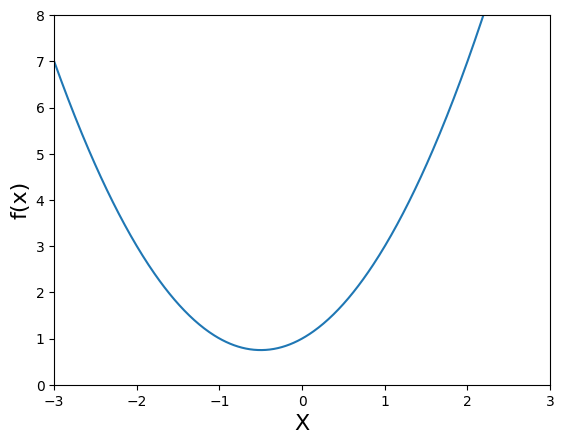

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [5]:
def df(x):
    return 2 * x + 1

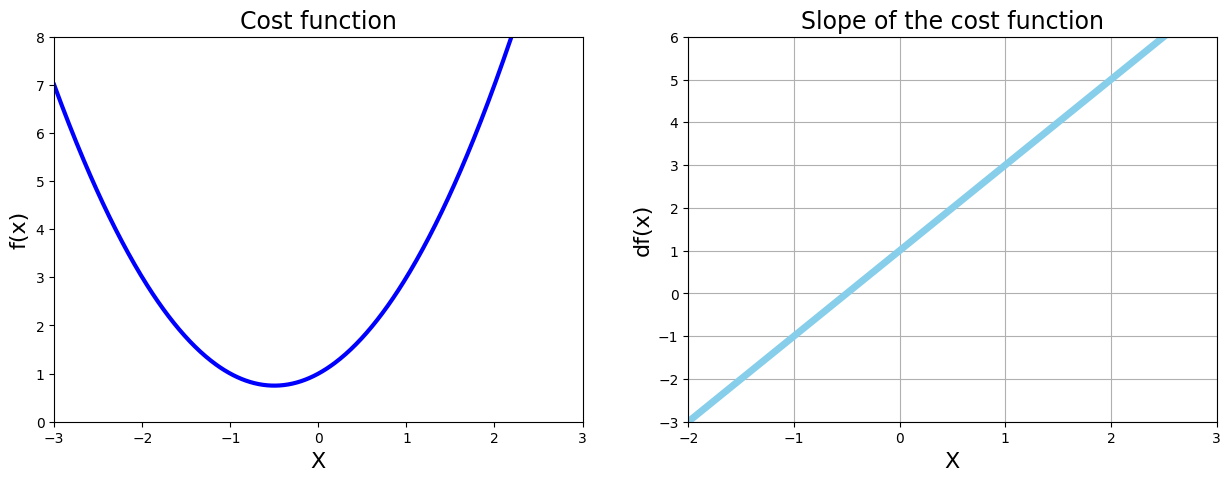

In [6]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

### Gradient Descent

In [7]:
# Function f(x) = x^2 and its derivative df(x) = 2x
def f(x):
    return x**2

def df(x):
    return 2*x

# Gradient Descent
new_x = 3  # Initial guess
previous_x = 0  # Starting point
step_multiplier = 0.1  # Learning rate
precision = 0.00001  # Precision for stopping criterion

x_list = [new_x]  # List to store x values at each step
slope_list = [df(new_x)]  # List to store the slope values at each step

# Loop for performing gradient descent
for n in range(500):
    previous_x = new_x  # Save the current value of x

    # Calculate the gradient (slope) at the current value of new_x
    gradient = df(new_x)  # The gradient of the function at current new_x

    # Update new_x using the gradient descent formula
    new_x = previous_x - step_multiplier * gradient  # Update new_x using the learning rate and gradient

    step_size = abs(new_x - previous_x)  # Calculate the step size for stopping criterion

    x_list.append(new_x)  # Save the new x value
    slope_list.append(df(new_x))  # Save the new slope value at the new x

    if step_size < precision:  # Check if the change in x is smaller than the precision threshold
        print('Loop ran this many times:', n)  # Print the number of iterations it took to converge
        break  # Stop the loop when the change in x is less than the desired precision

# Print final results
print('Local minimum occurs at:', new_x)  # The value of x where the local minimum occurs
print('Slope or df(x) value at this point is:', df(new_x))  # The slope at the minimum
print('f(x) value or cost at this point is:', f(new_x))  # The function value at the minimum


Loop ran this many times: 50
Local minimum occurs at: 3.425394462494306e-05
Slope or df(x) value at this point is: 6.850788924988612e-05
f(x) value or cost at this point is: 1.1733327223686654e-09


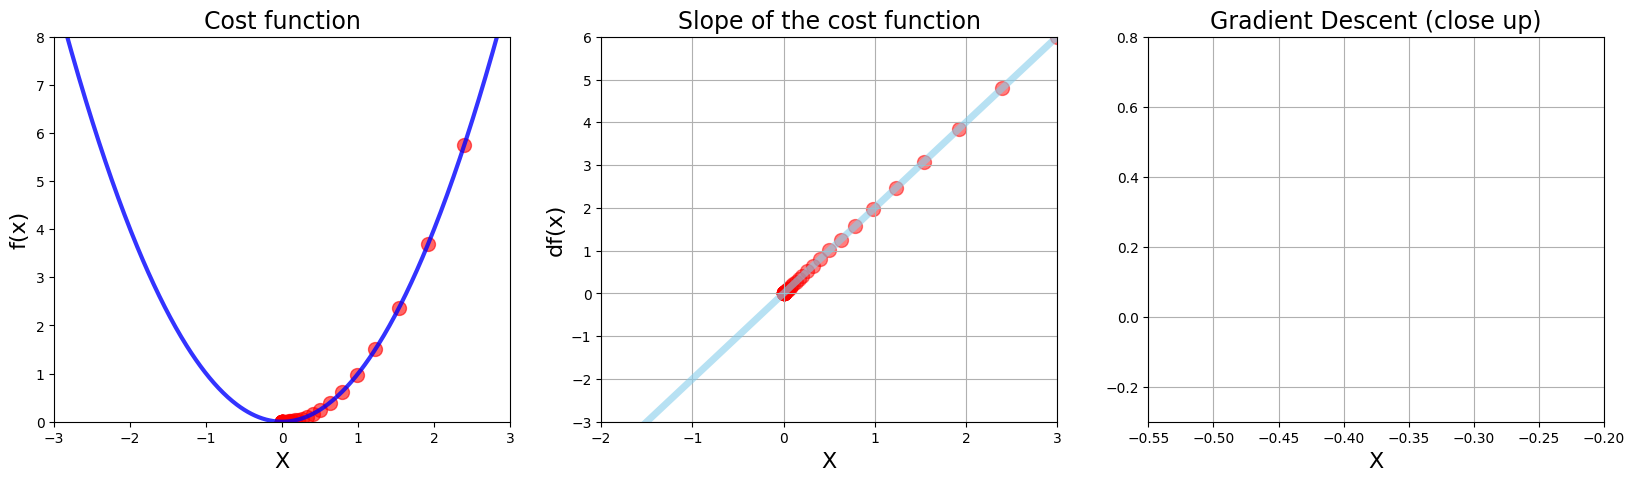

In [8]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

### Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

#### $$g(x) = x^4 - 4x^2 + 5$$

In [9]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return ## [REQUIRED]

def dg(x):
    return ## [REQUIRED]

In [10]:
## TASK-3 : Plot function and derivative side by side like has been done earlier

## Gradient Descent

In [11]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [12]:
def gradient_descent(dg, initial_guess, learning_rate, precision):
    # Initialize variables
    x = initial_guess  # Starting point (initial guess)
    step_size = float('inf')  # To ensure the loop starts
    list_x = [x]  # List to track all x values
    deriv_list = [dg(x)]  # List to track derivatives (slopes)

    # Loop until convergence (when step size is smaller than precision)
    while step_size > precision:
        # Calculate the gradient (derivative)
        gradient = dg(x)

        # Update x using gradient descent formula
        new_x = x - learning_rate * gradient

        # Calculate the step size (absolute difference between new and old x)
        step_size = abs(new_x - x)

        # Append the new x and derivative to their respective lists
        list_x.append(new_x)
        deriv_list.append(dg(new_x))

        # Update x for the next iteration
        x = new_x

    # Return the local minimum (x), the list of x values, and the list of derivative values
    return x, list_x, deriv_list

# Example usage:
def dg(x):
    # Example derivative function: f(x) = x^2, so df(x)/dx = 2x
    return 2 * x

# Run gradient descent
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)

# Print the results
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: 0.0234052067759206
Number of steps: 76


In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier, precision):
    # Initialize variables
    x = initial_guess  # Starting point (initial guess)
    step_size = float('inf')  # To ensure the loop starts
    list_x = [x]  # List to track all x values
    deriv_list = [derivative_func(x)]  # List to track derivatives (slopes)

    # Loop until convergence (when step size is smaller than precision)
    while step_size > precision:
        # Calculate the gradient (derivative) at the current x
        gradient = derivative_func(x)

        # Update x using the gradient descent formula
        new_x = x - multiplier * gradient

        # Calculate the step size (absolute difference between new and old x)
        step_size = abs(new_x - x)

        # Append the new x and derivative to their respective lists
        list_x.append(new_x)
        deriv_list.append(derivative_func(new_x))

        # Update x for the next iteration
        x = new_x

    # Return the local minimum (x), the list of x values, and the list of derivative values
    return x, list_x, deriv_list

# Example usage:
def dg(x):
    # Example derivative function: f(x) = x^2, so df(x)/dx = 2x
    return 2 * x

# Run gradient descent with the provided initial guess, multiplier, and precision
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5,
                                                 multiplier=0.01, precision=0.0001)

# Print the results
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: -0.004894871981406463
Number of steps: 230


In [14]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, max_steps=500):
    # Initialize variables
    x = initial_guess  # Starting point (initial guess)
    list_x = [x]  # List to track all x values
    deriv_list = [derivative_func(x)]  # List to track derivatives (slopes)

    # Loop until the maximum number of steps is reached
    for step in range(max_steps):
        # Calculate the gradient (derivative) at the current x
        gradient = derivative_func(x)

        # Update x using the gradient descent formula
        new_x = x - multiplier * gradient

        # Append the new x and derivative to their respective lists
        list_x.append(new_x)
        deriv_list.append(derivative_func(new_x))

        # Update x for the next iteration
        x = new_x

    # Return the local minimum (x), the list of x values, and the list of derivative values
    return x, list_x, deriv_list

# Example derivative function (for f(x) = x^2)
def dg(x):
    # Example derivative function: f(x) = x^2, so df(x)/dx = 2x
    return 2 * x

# Run gradient descent with the provided initial guess
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)

# Print the results
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: -4.102398514547262e-06
Number of steps: 501


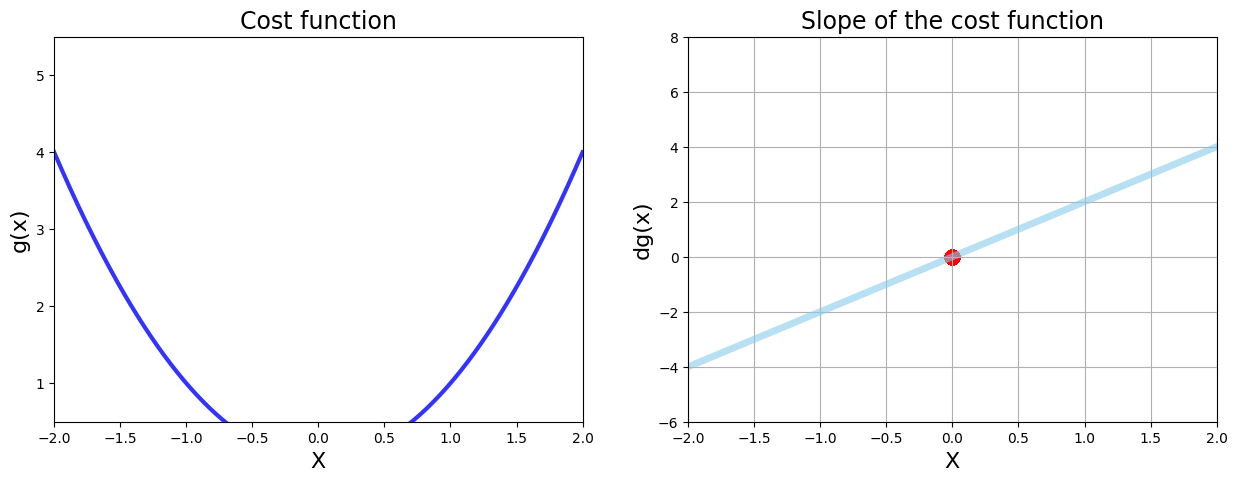

Local min occurs at: 0.0
Number of steps: 501


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function and its derivative
def g(x):
    return x**2  # Example cost function: f(x) = x^2

def dg(x):
    return 2 * x  # Derivative of f(x) = x^2 is f'(x) = 2x

# Gradient Descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, max_steps=500):
    # Initialize variables
    x = initial_guess  # Starting point (initial guess)
    list_x = [x]  # List to track all x values
    deriv_list = [derivative_func(x)]  # List to track derivatives (slopes)

    # Loop until the maximum number of steps is reached
    for step in range(max_steps):
        # Calculate the gradient (derivative) at the current x
        gradient = derivative_func(x)

        # Update x using the gradient descent formula
        new_x = x - multiplier * gradient

        # Append the new x and derivative to their respective lists
        list_x.append(new_x)
        deriv_list.append(derivative_func(new_x))

        # Update x for the next iteration
        x = new_x

    # Return the local minimum (x), the list of x values, and the list of derivative values
    return x, list_x, deriv_list

# Call gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0)

# Generate x values for plotting
x_2 = np.linspace(-2, 2, 400)  # Generate 400 points from -2 to 2 for smooth curves

# Plotting
plt.figure(figsize=[15, 5])

# 1st Chart: Cost function (g(x) = x^2)
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)  # Plot the cost function
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)  # Plot the gradient descent steps

# 2nd Chart: Derivative (dg(x) = 2x)
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)  # Plot the derivative
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)  # Plot the gradient descent steps

# Show the plots
plt.show()

# Output the final results
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


### Example 3 - Divergence and Overflow

#### $$h(x) = x^5 - 2x^4 + 2$$

In [16]:
## TASK-4 : Code the same things as they were done for the first two examples

#### Learning Rate

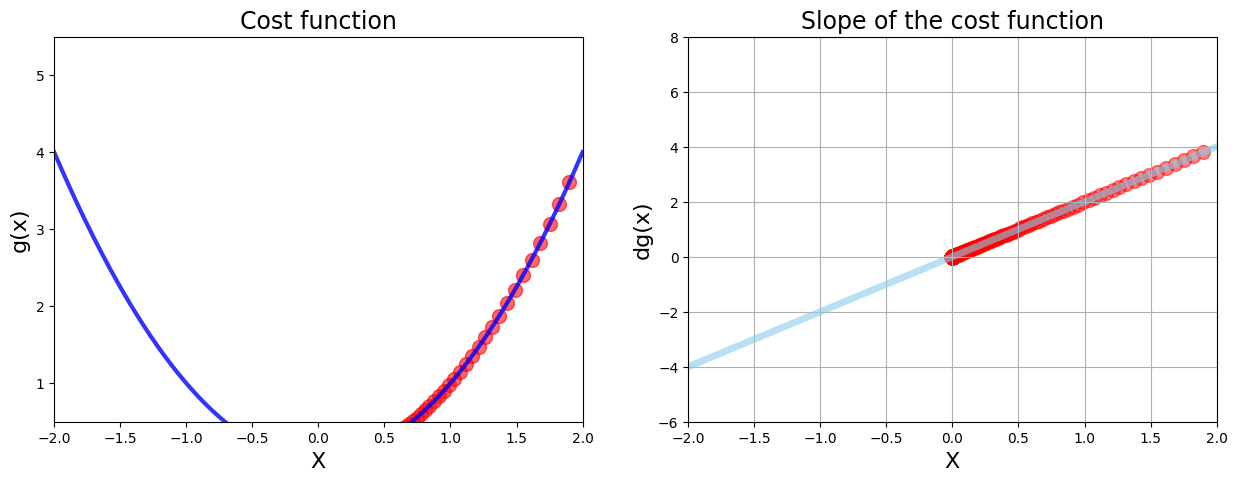

Number of steps is:  501


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function (g(x) = x^2)
def g(x):
    return x**2  # Example cost function: f(x) = x^2

# Derivative of the cost function (dg(x) = 2x)
def dg(x):
    return 2 * x  # Derivative of f(x) = x^2 is f'(x) = 2x

# Gradient Descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, max_iter=500):
    x = initial_guess  # Starting point (initial guess)
    list_x = [x]  # List to track all x values
    deriv_list = [derivative_func(x)]  # List to track derivatives (slopes)

    # Loop until the maximum number of iterations is reached
    for step in range(max_iter):
        gradient = derivative_func(x)  # Calculate the gradient (derivative) at the current x
        new_x = x - multiplier * gradient  # Update x using the gradient descent formula
        list_x.append(new_x)  # Append new_x to list_x
        deriv_list.append(derivative_func(new_x))  # Append the derivative at new_x to deriv_list
        x = new_x  # Update x for the next iteration

    return x, list_x, deriv_list

# Generate x values for plotting the function and its derivative
x_2 = np.linspace(-2, 2, 400)  # Generate 400 points from -2 to 2 for smooth curves

# Call gradient descent function with the new parameters
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                 multiplier=0.02, max_iter=500)

# Plotting
plt.figure(figsize=[15, 5])

# 1st Chart: Cost function (g(x) = x^2)
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)  # Plot the cost function
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)  # Plot the gradient descent steps

# 2nd Chart: Derivative (dg(x) = 2x)
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)  # Plot the derivative
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)  # Plot the gradient descent steps

# Show the plots
plt.show()

# Output the number of steps taken
print('Number of steps is: ', len(list_x))


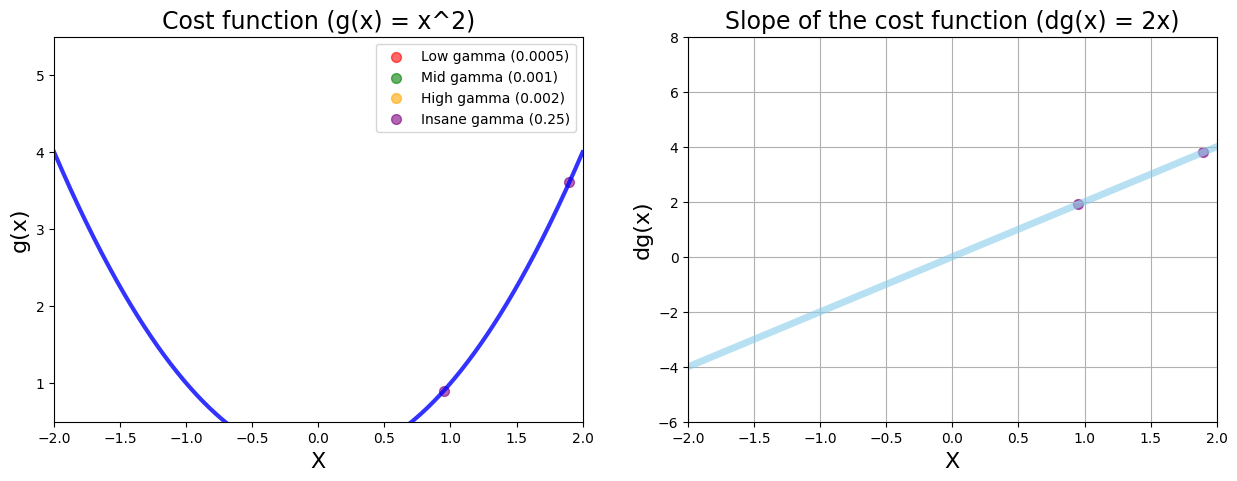

Low gamma minimum: 2.997 with 2 steps
Mid gamma minimum: 2.994 with 2 steps
High gamma minimum: 2.988 with 2 steps
Insane gamma minimum: 0.95 with 2 steps


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function (g(x) = x^2)
def g(x):
    return x**2  # Example cost function: f(x) = x^2

# Derivative of the cost function (dg(x) = 2x)
def dg(x):
    return 2 * x  # Derivative of f(x) = x^2 is f'(x) = 2x

# Gradient Descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001, max_iter=500):
    x = initial_guess  # Starting point (initial guess)
    list_x = [x]  # List to track all x values
    deriv_list = [derivative_func(x)]  # List to track derivatives (slopes)

    # Loop until the maximum number of iterations is reached
    for step in range(max_iter):
        gradient = derivative_func(x)  # Calculate the gradient (derivative) at the current x
        new_x = x - multiplier * gradient  # Update x using the gradient descent formula
        list_x.append(new_x)  # Append new_x to list_x
        deriv_list.append(derivative_func(new_x))  # Append the derivative at new_x to deriv_list
        x = new_x  # Update x for the next iteration

        # If the change in x is smaller than the precision, break the loop
        if abs(new_x - x) < precision:
            break

    return x, list_x, deriv_list

# Set the number of iterations
n = 100

# Run gradient descent with different learning rates
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment with a large learning rate (insane gamma)
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting the results
plt.figure(figsize=[15, 5])

# 1st Chart: Cost function for different learning rates
plt.subplot(1, 2, 1)
x_2 = np.linspace(-2, 2, 400)  # Generate 400 points from -2 to 2 for smooth curves
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function (g(x) = x^2)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

# Plot the cost function
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

# Plot the gradient descent steps for different learning rates
plt.scatter(low_gamma[1], g(np.array(low_gamma[1])), color='red', s=50, alpha=0.6, label='Low gamma (0.0005)')
plt.scatter(mid_gamma[1], g(np.array(mid_gamma[1])), color='green', s=50, alpha=0.6, label='Mid gamma (0.001)')
plt.scatter(high_gamma[1], g(np.array(high_gamma[1])), color='orange', s=50, alpha=0.6, label='High gamma (0.002)')
plt.scatter(insane_gamma[1], g(np.array(insane_gamma[1])), color='purple', s=50, alpha=0.6, label='Insane gamma (0.25)')

plt.legend()

# 2nd Chart: Derivative for different learning rates
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function (dg(x) = 2x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

# Plot the derivative
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)

# Plot the derivative values at different learning rates
plt.scatter(low_gamma[1], low_gamma[2], color='red', s=50, alpha=0.6)
plt.scatter(mid_gamma[1], mid_gamma[2], color='green', s=50, alpha=0.6)
plt.scatter(high_gamma[1], high_gamma[2], color='orange', s=50, alpha=0.6)
plt.scatter(insane_gamma[1], insane_gamma[2], color='purple', s=50, alpha=0.6)

plt.show()

# Output the results of the different runs
print(f"Low gamma minimum: {low_gamma[0]} with {len(low_gamma[1])} steps")
print(f"Mid gamma minimum: {mid_gamma[0]} with {len(mid_gamma[1])} steps")
print(f"High gamma minimum: {high_gamma[0]} with {len(high_gamma[1])} steps")
print(f"Insane gamma minimum: {insane_gamma[0]} with {len(insane_gamma[1])} steps")


In [19]:
## TASK-7 : Plot reduction in cost for each iteration

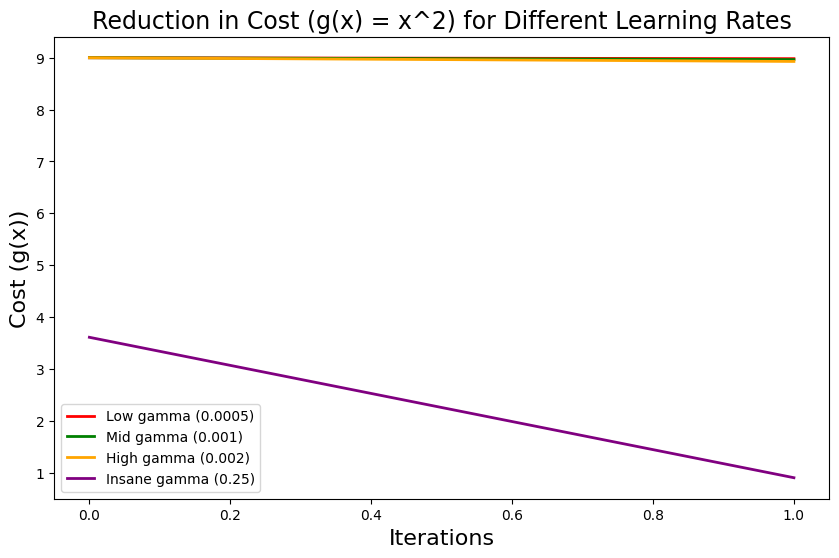

Low gamma minimum: 2.997 with 2 steps
Mid gamma minimum: 2.994 with 2 steps
High gamma minimum: 2.988 with 2 steps
Insane gamma minimum: 0.95 with 2 steps


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function (g(x) = x^2)
def g(x):
    return x**2  # Example cost function: f(x) = x^2

# Derivative of the cost function (dg(x) = 2x)
def dg(x):
    return 2 * x  # Derivative of f(x) = x^2 is f'(x) = 2x

# Gradient Descent function with tracking of cost values
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001, max_iter=500):
    x = initial_guess  # Starting point (initial guess)
    list_x = [x]  # List to track all x values
    deriv_list = [derivative_func(x)]  # List to track derivatives (slopes)
    cost_list = [g(x)]  # List to track cost (g(x)) values

    # Loop until the maximum number of iterations is reached
    for step in range(max_iter):
        gradient = derivative_func(x)  # Calculate the gradient (derivative) at the current x
        new_x = x - multiplier * gradient  # Update x using the gradient descent formula
        list_x.append(new_x)  # Append new_x to list_x
        deriv_list.append(derivative_func(new_x))  # Append the derivative at new_x to deriv_list
        cost_list.append(g(new_x))  # Append the cost at new_x to cost_list
        x = new_x  # Update x for the next iteration

        # If the change in x is smaller than the precision, break the loop
        if abs(new_x - x) < precision:
            break

    return x, list_x, deriv_list, cost_list

# Set the number of iterations
n = 100

# Run gradient descent with different learning rates
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment with a large learning rate (insane gamma)
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting the reduction in cost for each iteration

plt.figure(figsize=[10, 6])

# Plot cost reduction for different learning rates
plt.plot(low_gamma[3], label='Low gamma (0.0005)', color='red', linewidth=2)
plt.plot(mid_gamma[3], label='Mid gamma (0.001)', color='green', linewidth=2)
plt.plot(high_gamma[3], label='High gamma (0.002)', color='orange', linewidth=2)
plt.plot(insane_gamma[3], label='Insane gamma (0.25)', color='purple', linewidth=2)

plt.title('Reduction in Cost (g(x) = x^2) for Different Learning Rates', fontsize=17)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Cost (g(x))', fontsize=16)
plt.legend()

plt.show()

# Output the results of the different runs
print(f"Low gamma minimum: {low_gamma[0]} with {len(low_gamma[1])} steps")
print(f"Mid gamma minimum: {mid_gamma[0]} with {len(mid_gamma[1])} steps")
print(f"High gamma minimum: {high_gamma[0]} with {len(high_gamma[1])} steps")
print(f"Insane gamma minimum: {insane_gamma[0]} with {len(insane_gamma[1])} steps")


### Example 4 - Data Viz with 3D Charts

#### Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [21]:
## TASK-8 : Code the same things as they were done for the first two examples

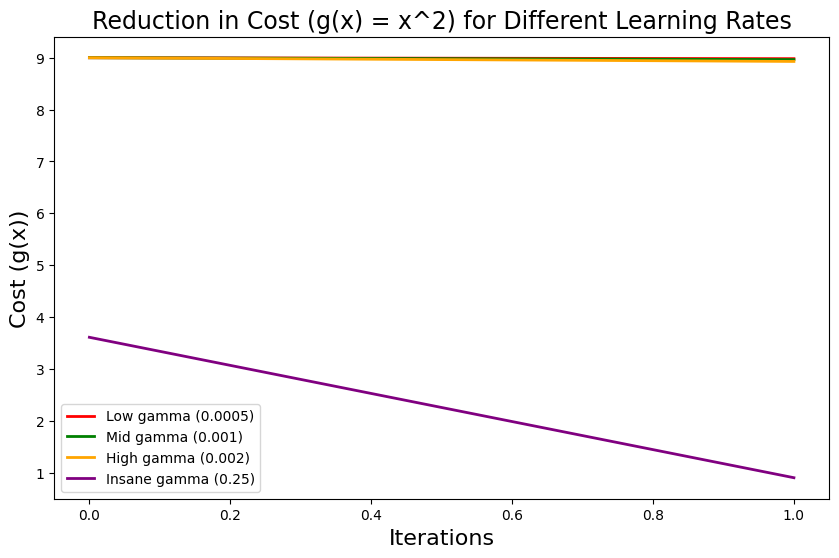

Low gamma minimum: 2.997 with 2 steps
Mid gamma minimum: 2.994 with 2 steps
High gamma minimum: 2.988 with 2 steps
Insane gamma minimum: 0.95 with 2 steps


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function (g(x) = x^2)
def g(x):
    return x**2  # Example cost function: f(x) = x^2

# Derivative of the cost function (dg(x) = 2x)
def dg(x):
    return 2 * x  # Derivative of f(x) = x^2 is f'(x) = 2x

# Gradient Descent function with tracking of cost values
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001, max_iter=500):
    x = initial_guess  # Starting point (initial guess)
    list_x = [x]  # List to track all x values
    deriv_list = [derivative_func(x)]  # List to track derivatives (slopes)
    cost_list = [g(x)]  # List to track cost (g(x)) values

    # Loop until the maximum number of iterations is reached
    for step in range(max_iter):
        gradient = derivative_func(x)  # Calculate the gradient (derivative) at the current x
        new_x = x - multiplier * gradient  # Update x using the gradient descent formula
        list_x.append(new_x)  # Append new_x to list_x
        deriv_list.append(derivative_func(new_x))  # Append the derivative at new_x to deriv_list
        cost_list.append(g(new_x))  # Append the cost at new_x to cost_list
        x = new_x  # Update x for the next iteration

        # If the change in x is smaller than the precision, break the loop
        if abs(new_x - x) < precision:
            break

    return x, list_x, deriv_list, cost_list

# Set the number of iterations
n = 100

# Run gradient descent with different learning rates
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment with a large learning rate (insane gamma)
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting the reduction in cost for each iteration

plt.figure(figsize=[10, 6])

# Plot cost reduction for different learning rates
plt.plot(low_gamma[3], label='Low gamma (0.0005)', color='red', linewidth=2)
plt.plot(mid_gamma[3], label='Mid gamma (0.001)', color='green', linewidth=2)
plt.plot(high_gamma[3], label='High gamma (0.002)', color='orange', linewidth=2)
plt.plot(insane_gamma[3], label='Insane gamma (0.25)', color='purple', linewidth=2)

plt.title('Reduction in Cost (g(x) = x^2) for Different Learning Rates', fontsize=17)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Cost (g(x))', fontsize=16)
plt.legend()

plt.show()

# Output the results of the different runs
print(f"Low gamma minimum: {low_gamma[0]} with {len(low_gamma[1])} steps")
print(f"Mid gamma minimum: {mid_gamma[0]} with {len(mid_gamma[1])} steps")
print(f"High gamma minimum: {high_gamma[0]} with {len(high_gamma[1])} steps")
print(f"Insane gamma minimum: {insane_gamma[0]} with {len(insane_gamma[1])} steps")


In [23]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


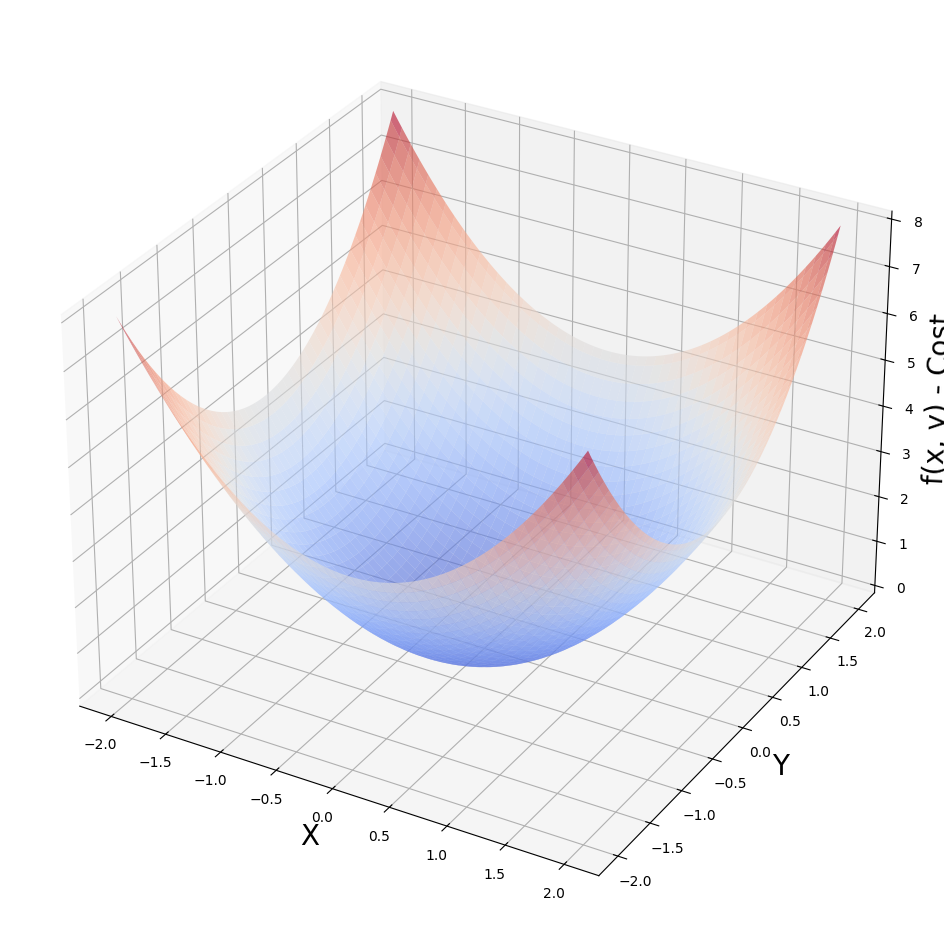

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the cost function f(x, y) - Example: f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2  # A simple example of a cost function

# Create mesh grids for x and y in the range [-2, 2] with a step size of 0.1
x_4 = np.linspace(-2, 2, 100)  # 100 points between -2 and 2 for x-axis
y_4 = np.linspace(-2, 2, 100)  # 100 points between -2 and 2 for y-axis
x_4, y_4 = np.meshgrid(x_4, y_4)  # Create mesh grid for x and y

# Plotting the surface
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')  # Use add_subplot for correct axis creation

# Labels for the axes
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Plot the surface using the function f(x, y) to get the cost values
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.6)

# Show the plot
plt.show()


### TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.


#### Partial Derivatives & Symbolic Computation

#### $$\frac{\partial f}{\partial x} = ## [REQUIRED]

#### $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [25]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  x**2 + y**2
Partial derivative wrt x is:  2*y
Value of f(x,y) at x=1.8 y=1.0 is:  4.24000000000000
Value of partial derivative wrt x:  3.60000000000000


#### Batch Gradient Descent with SymPy

*   List item
*   List item



In [26]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.57835979496953e-48 8.76866552760853e-49]
Minimum occurs at x value of:  6.31343917987813e-49
Minimum occurs at y value of:  3.50746621104341e-49
The cost is:  5.21618334996315e-97


In [27]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return ## [REQUIRED]

def fpy(x, y):
    return ## [REQUIRED]

In [28]:
import numpy as np

# Define the cost function f(x, y) = x^2 + y^2 (Example)
def f(x, y):
    return x**2 + y**2

# Define the gradients (partial derivatives)
def fpx(x, y):
    return 2 * x  # Partial derivative with respect to x

def fpy(x, y):
    return 2 * y  # Partial derivative with respect to y

# Gradient Descent Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guess for x and y

# Run gradient descent
for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])

    # Update the parameters
    params = params - multiplier * gradients

# Results
print('Values in gradient array:', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array: [1.57835979e-48 8.76866553e-49]
Minimum occurs at x value of:  6.313439179878134e-49
Minimum occurs at y value of:  3.507466211043411e-49
The cost is:  5.216183349963152e-97




```
#### This is formatted as code
```

### Graphing 3D Gradient Descent

In [29]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [1.86728201e-19 1.03737889e-19]
Minimum occurs at x value of:  7.469128023985783e-20
Minimum occurs at y value of:  4.149515568880998e-20
The cost is:  7.300635289507557e-39


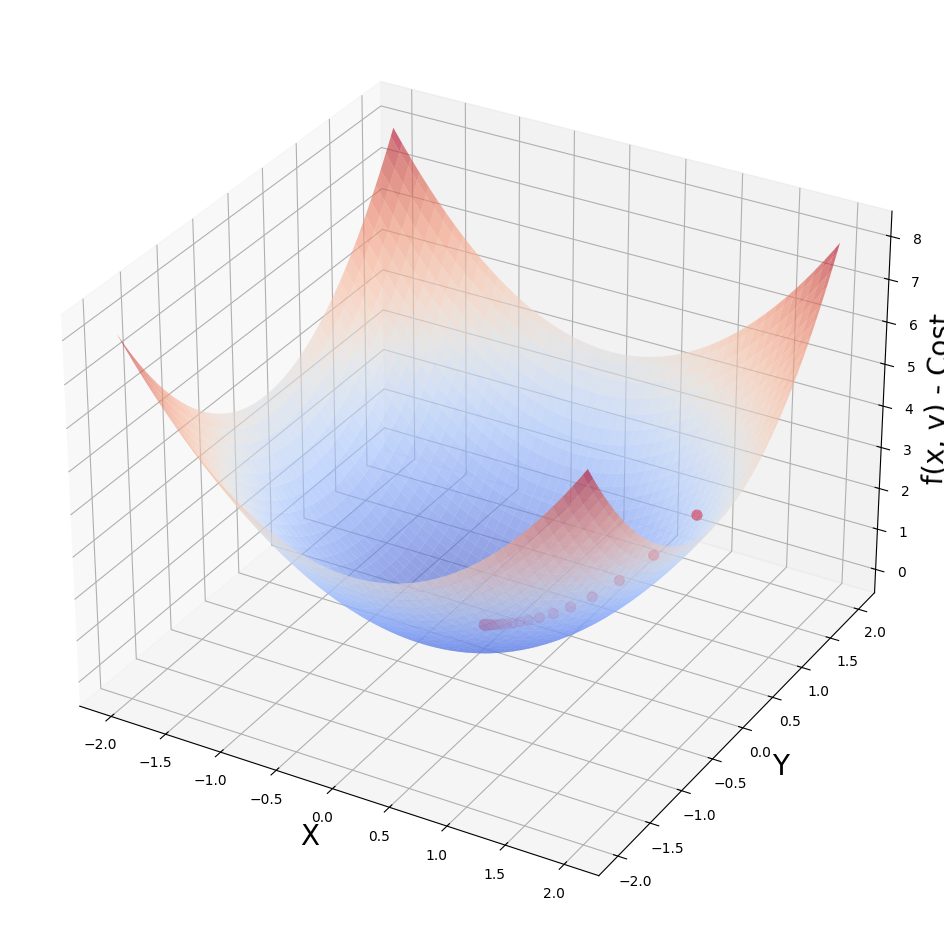

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the cost function f(x, y) - Example: f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

# Define the gradients (partial derivatives)
def fpx(x, y):
    return 2 * x  # Partial derivative with respect to x

def fpy(x, y):
    return 2 * y  # Partial derivative with respect to y

# Gradient Descent Setup
multiplier = 0.1  # Learning rate
max_iter = 50  # Number of iterations for gradient descent
params = np.array([1.8, 1.0])  # Initial guess for x and y
values_array = []  # To store the parameter values during the descent

# Run gradient descent
for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])  # Gradient with respect to x
    gradient_y = fpy(params[0], params[1])  # Gradient with respect to y
    gradients = np.array([gradient_x, gradient_y])

    # Update the parameters (x, y)
    params = params - multiplier * gradients

    # Save the updated parameter values for plotting
    values_array.append(params)

# Convert values_array to a NumPy array for easier plotting
values_array = np.array(values_array)

# Create mesh grids for x and y in the range [-2, 2] with a step size of 0.1
x_4 = np.linspace(-2, 2, 100)  # 100 points between -2 and 2 for x-axis
y_4 = np.linspace(-2, 2, 100)  # 100 points between -2 and 2 for y-axis
x_4, y_4 = np.meshgrid(x_4, y_4)  # Create mesh grid for x and y

# Plotting the surface
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')  # Create a 3D plot

# Labels for the axes
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Plot the surface using the function f(x, y) to get the cost values
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.6)

# Scatter the values from gradient descent
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

# Show the plot
plt.show()


#### For Reference, practice and play with the code below

### Example 5 - Working with data & a real cost function

#### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [31]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [32]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


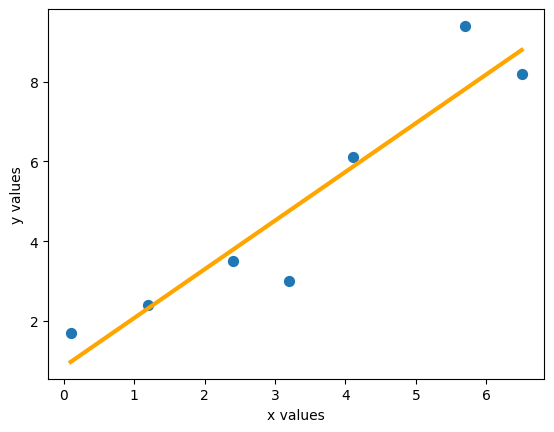

In [33]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [34]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [35]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [36]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


#### 3D Plot for the MSE Cost Function

#### Make data for thetas

In [37]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


#### Calc MSE using nested for loops

In [38]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

<ipython-input-38-050b7bf9b7b1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_cost[i][j] = mse(y_5, y_hat)


Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


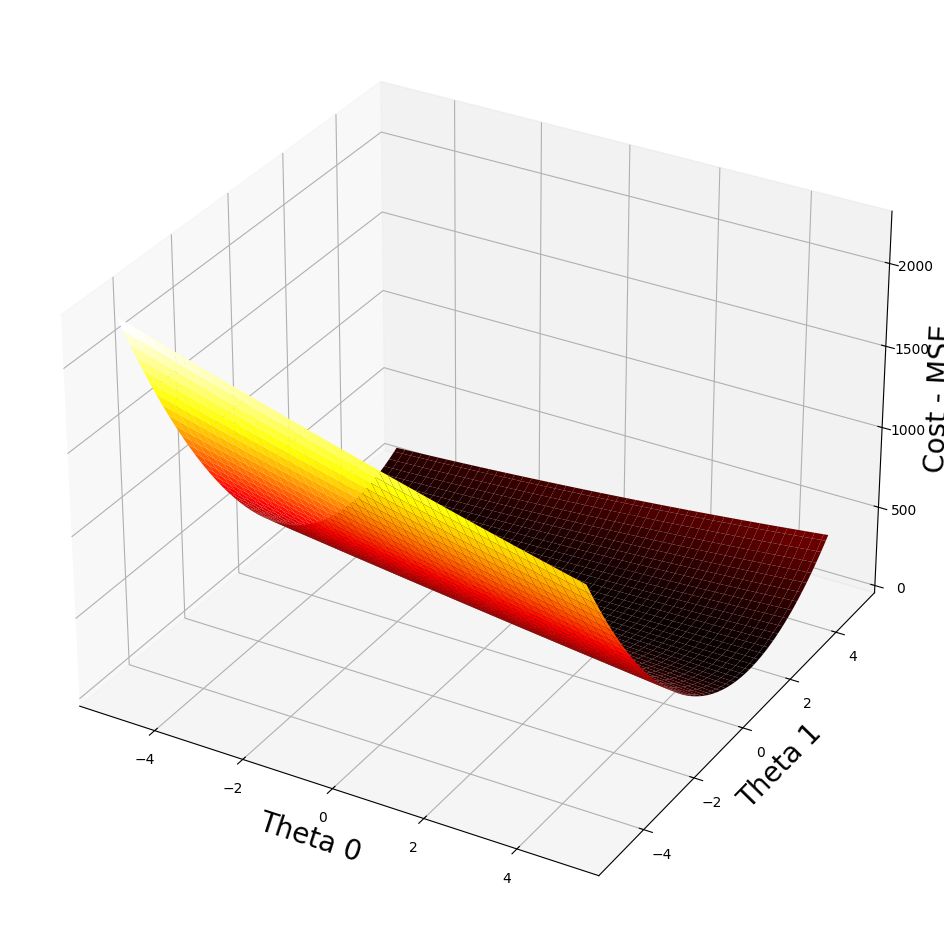

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the dataset (example)
# y = theta_0 + theta_1 * x + some noise
x_data = np.linspace(0, 10, 100)
y_data = 3 + 2 * x_data + np.random.randn(100)  # Assume true theta_0 = 3, theta_1 = 2

# Define the cost function (MSE) for given theta_0 and theta_1
def mse(theta_0, theta_1, x, y):
    predictions = theta_0 + theta_1 * x
    return np.mean((predictions - y) ** 2)

# Create a grid of theta_0 and theta_1 values
theta_0_vals = np.linspace(-5, 5, 100)
theta_1_vals = np.linspace(-5, 5, 100)
plot_t0, plot_t1 = np.meshgrid(theta_0_vals, theta_1_vals)

# Calculate the MSE for each pair of theta_0 and theta_1
plot_cost = np.zeros_like(plot_t0)
for i in range(plot_t0.shape[0]):
    for j in range(plot_t0.shape[1]):
        plot_cost[i, j] = mse(plot_t0[i, j], plot_t1[i, j], x_data, y_data)

# Plotting the MSE surface
fig = plt.figure(figsize=[16, 12])

# Add 3D subplot with the correct projection
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Plot the surface using the function f(x, y) to get the cost values
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)

plt.show()


Min value of plot_cost: 0.8705466051500172
Min occurs at (i,j): (69, 82)
Min MSE for Theta 0 at plot_t0[69][82]: 3.282828282828282
Min MSE for Theta 1 at plot_t1[69][82]: 1.9696969696969697


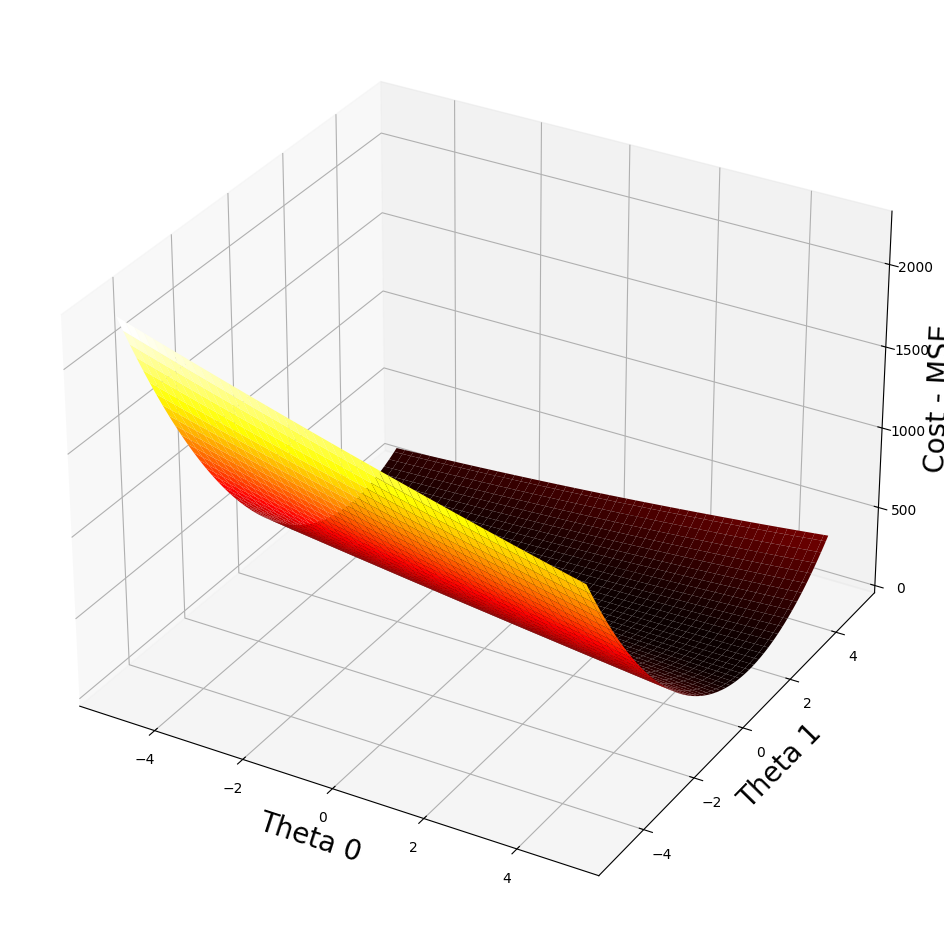

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the dataset (example)
# y = theta_0 + theta_1 * x + some noise
x_data = np.linspace(0, 10, 100)
y_data = 3 + 2 * x_data + np.random.randn(100)  # Assume true theta_0 = 3, theta_1 = 2

# Define the cost function (MSE) for given theta_0 and theta_1
def mse(theta_0, theta_1, x, y):
    predictions = theta_0 + theta_1 * x
    return np.mean((predictions - y) ** 2)

# Create a grid of theta_0 and theta_1 values
theta_0_vals = np.linspace(-5, 5, 100)
theta_1_vals = np.linspace(-5, 5, 100)
plot_t0, plot_t1 = np.meshgrid(theta_0_vals, theta_1_vals)

# Calculate the MSE for each pair of theta_0 and theta_1
plot_cost = np.zeros_like(plot_t0)
for i in range(plot_t0.shape[0]):
    for j in range(plot_t0.shape[1]):
        plot_cost[i, j] = mse(plot_t0[i, j], plot_t1[i, j], x_data, y_data)

# Find the minimum value of plot_cost
min_cost = plot_cost.min()
print('Min value of plot_cost:', min_cost)

# Find the indices where the minimum value occurs
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)

# Retrieve the theta_0 and theta_1 corresponding to the minimum MSE
theta_0_min = plot_t0[ij_min]
theta_1_min = plot_t1[ij_min]
print('Min MSE for Theta 0 at plot_t0[{}][{}]:'.format(ij_min[0], ij_min[1]), theta_0_min)
print('Min MSE for Theta 1 at plot_t1[{}][{}]:'.format(ij_min[0], ij_min[1]), theta_1_min)

# Plotting the MSE surface
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Plot the surface using the function f(x, y) to get the cost values
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)

plt.show()


#### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

#### MSE & Gradient Descent

In [41]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

Min occurs at Theta 0: 3.0928882876022414
Min occurs at Theta 1: 1.9781634740234608
MSE is: 0.9400189753949185


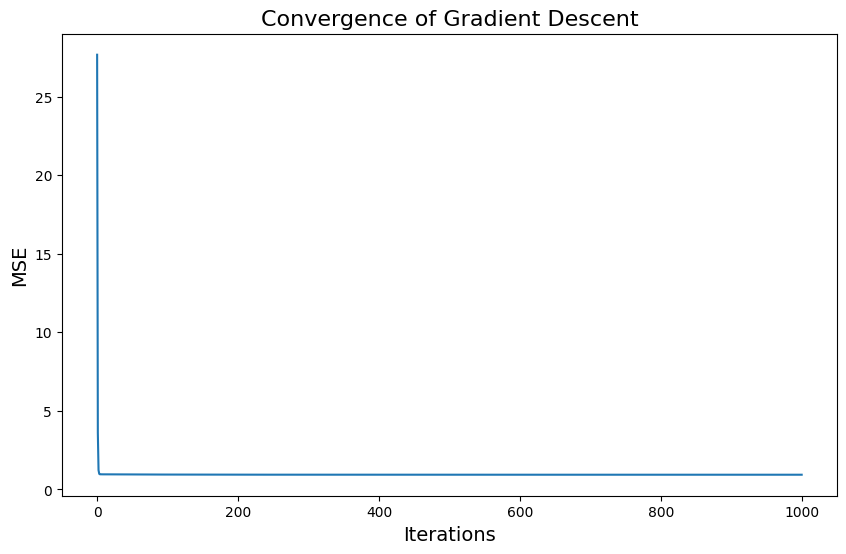

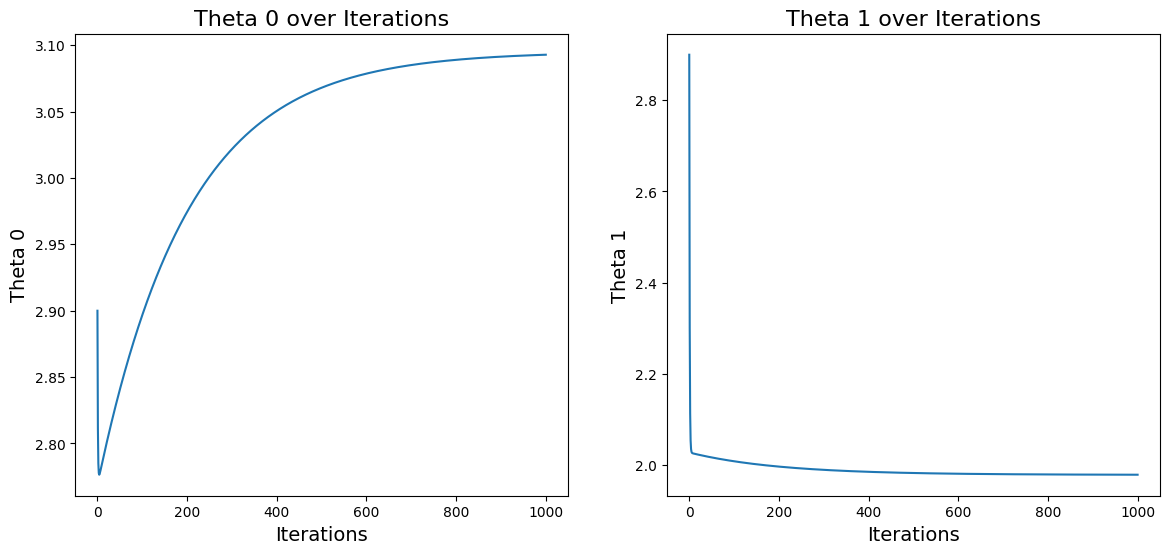

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset (example)
x_5 = np.linspace(0, 10, 100)  # Example: 100 data points between 0 and 10
y_5 = 3 + 2 * x_5 + np.random.randn(100)  # y = 3 + 2*x + noise, assume true theta_0 = 3, theta_1 = 2

# Define the Mean Squared Error (MSE) function
def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# Define the gradient of MSE with respect to theta_0 and theta_1
def grad(x, y, thetas):
    # Gradient with respect to theta_0 and theta_1
    theta_0, theta_1 = thetas
    pred = theta_0 + theta_1 * x
    error = pred - y
    grad_theta_0 = np.mean(2 * error)  # Derivative w.r.t. theta_0
    grad_theta_1 = np.mean(2 * error * x)  # Derivative w.r.t. theta_1
    return np.array([grad_theta_0, grad_theta_1])

# Gradient Descent Setup
multiplier = 0.01  # Learning rate
thetas = np.array([2.9, 2.9])  # Initial guess for theta_0 and theta_1

# Collect data points for plotting
plot_vals = thetas.reshape(1, 2)  # Store the initial values
mse_vals = np.array([mse(y_5, thetas[0] + thetas[1] * x_5)])  # Calculate initial MSE

# Run gradient descent
for i in range(1000):
    # Update thetas using the gradient
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the updated parameter values and MSE to our arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(mse_vals, mse(y_5, thetas[0] + thetas[1] * x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1] * x_5))

# Optional: Plot the MSE over iterations to see the convergence
plt.figure(figsize=(10, 6))
plt.plot(mse_vals)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.title('Convergence of Gradient Descent', fontsize=16)
plt.show()

# Optional: Plot the parameter values (theta_0 and theta_1) over iterations
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Theta 0 plot
ax[0].plot(plot_vals[:, 0])
ax[0].set_xlabel('Iterations', fontsize=14)
ax[0].set_ylabel('Theta 0', fontsize=14)
ax[0].set_title('Theta 0 over Iterations', fontsize=16)

# Theta 1 plot
ax[1].plot(plot_vals[:, 1])
ax[1].set_xlabel('Iterations', fontsize=14)
ax[1].set_ylabel('Theta 1', fontsize=14)
ax[1].set_title('Theta 1 over Iterations', fontsize=16)

plt.show()


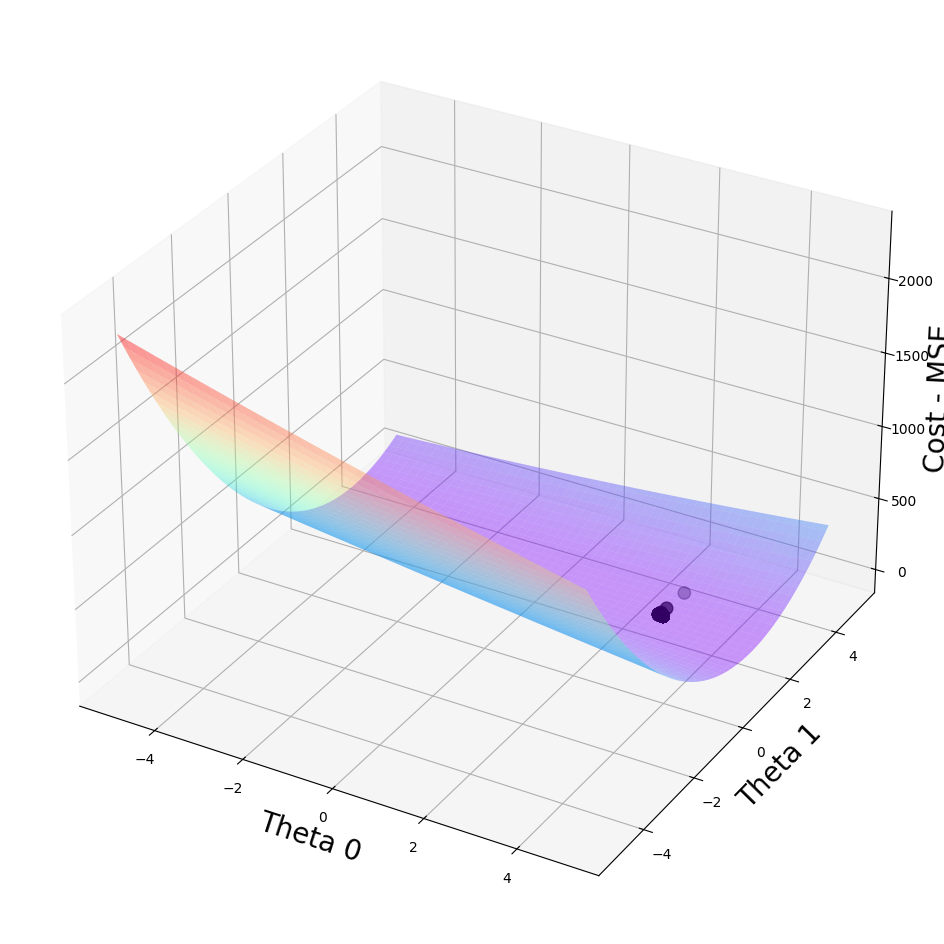

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the dataset (example)
x_5 = np.linspace(0, 10, 100)  # Example: 100 data points between 0 and 10
y_5 = 3 + 2 * x_5 + np.random.randn(100)  # y = 3 + 2*x + noise, assume true theta_0 = 3, theta_1 = 2

# Define the Mean Squared Error (MSE) function
def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# Define the gradient of MSE with respect to theta_0 and theta_1
def grad(x, y, thetas):
    # Gradient with respect to theta_0 and theta_1
    theta_0, theta_1 = thetas
    pred = theta_0 + theta_1 * x
    error = pred - y
    grad_theta_0 = np.mean(2 * error)  # Derivative w.r.t. theta_0
    grad_theta_1 = np.mean(2 * error * x)  # Derivative w.r.t. theta_1
    return np.array([grad_theta_0, grad_theta_1])

# Gradient Descent Setup
multiplier = 0.01  # Learning rate
thetas = np.array([2.9, 2.9])  # Initial guess for theta_0 and theta_1

# Collect data points for plotting
plot_vals = thetas.reshape(1, 2)  # Store the initial values
mse_vals = np.array([mse(y_5, thetas[0] + thetas[1] * x_5)])  # Calculate initial MSE

# Run gradient descent
for i in range(1000):
    # Update thetas using the gradient
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the updated parameter values and MSE to our arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(mse_vals, mse(y_5, thetas[0] + thetas[1] * x_5))

# Create a grid of theta_0 and theta_1 values
theta_0_vals = np.linspace(-5, 5, 100)
theta_1_vals = np.linspace(-5, 5, 100)
plot_t0, plot_t1 = np.meshgrid(theta_0_vals, theta_1_vals)

# Calculate the MSE for each pair of theta_0 and theta_1
plot_cost = np.zeros_like(plot_t0)
for i in range(plot_t0.shape[0]):
    for j in range(plot_t0.shape[1]):
        # Calculate cost over the grid
        plot_cost[i, j] = mse(y_5, plot_t0[i, j] + plot_t1[i, j] * x_5)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the dataset (example)
x_5 = np.linspace(0, 10, 100)  # Example: 100 data points between 0 and 10
y_5 = 3 + 2 * x_5 + np.random.randn(100)  # y = 3 + 2*x + noise, assume true theta_0 = 3, theta_1 = 2

# Define the Mean Squared Error (MSE) function
def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# Define the gradient of MSE with respect to theta_0 and theta_1
def grad(x, y, thetas):
    # Gradient with respect to theta_0 and theta_1
    theta_0, theta_1 = thetas
    pred = theta_0 + theta_1 * x
    error = pred - y
    grad_theta_0 = np.mean(2 * error)  # Derivative w.r.t. theta_0
    grad_theta_1 = np.mean(2 * error * x)  # Derivative w.r.t. theta_1
    return np.array([grad_theta_0, grad_theta_1])

# Gradient Descent Setup
multiplier = 0.01  # Learning rate
thetas = np.array([2.9, 2.9])  # Initial guess for theta_0 and theta_1

# Collect data points for plotting
plot_vals = thetas.reshape(1, 2)  # Store the initial values
mse_vals = np.array([mse(y_5, thetas[0] + thetas[1] * x_5)])  # Calculate initial MSE

# Run gradient descent
for i in range(1000):
    # Update thetas using the gradient
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the updated parameter values and MSE to our arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(mse_vals, mse(y_5, thetas[0] + thetas[1] * x_5))

# Create a grid of theta_0 and theta_1 values
theta_0_vals = np.linspace(-5, 5, 100)
theta_1_vals = np.linspace(-5, 5, 100)
plot_t0, plot_t1 = np.meshgrid(theta_0_vals, theta_1_vals)

# Calculate the MSE for each pair of theta_0 and theta_1
plot_cost = np.zeros_like(plot_t0)
for i in range(plot_t0.shape[0]):
    for j in range(plot_t0.shape[1]):
        plot_cost[i, j] = mse(y_5, plot_t0[i, j] + plot_t1[i, j] * x_5)

# Plotting the MSE surface and gradient descent points
fig = plt.figure(figsize=[16, 12])

# Create a 3D axis using add_subplot
ax = fig.add_subplot(111, projection='3d')

# Set axis labels
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Plot the MSE surface using the function f(x, y) to get the cost values
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)

# Scatter the gradient descent parameter values
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')

# Show the plot
plt.show()
